In [55]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import double_exo
importlib.reload(double_exo)

<module 'double_exo' from '/run/netsop/u/home-sam/home/aloyens/Internship_CACOLAC/sim_models/First_sim_CACOLAC/double_exo.py'>

# 1 Only the pests $x$

### The model following the formalism of ```double_exo.py``` 

#### Continuous model

\begin{cases}
\dot{x} = rx(1-\frac{x}{K})y- E_xx- 0 \times y\\ 
\dot{y} = 0 \times y - 0 \times y\\
x(nT^{+}) = x(nT) - E_x \times 0\\
y(nT^{+}) = y(nT) - E_y \times 0\\
\end{cases}  
with $y_0 = 0$

#### Impulsive model

\begin{cases}
    \dot{x} = rx(1-\frac{x}{K}) - 0 \times y\\ 
    \dot{y} = 0 \times y - 0 \times y\\
    x(nT^{+}) = e^{-E_xT}x(nT) = x(nT) - (1 - e^{-E_xT})x(nT)\\
    y(nT^{+}) = y(nT) - E_y \times 0
\end{cases}
with $y_0 = 0$

In [56]:
#Fixed parameters
r = 0.5
K = 10 
a = 0.1
m = 0.1
gamma = 0.8

t_0 = 0
t_n = 100

tt = 1 #just to not have a missing argument t when we solve models

Plot with the classical function

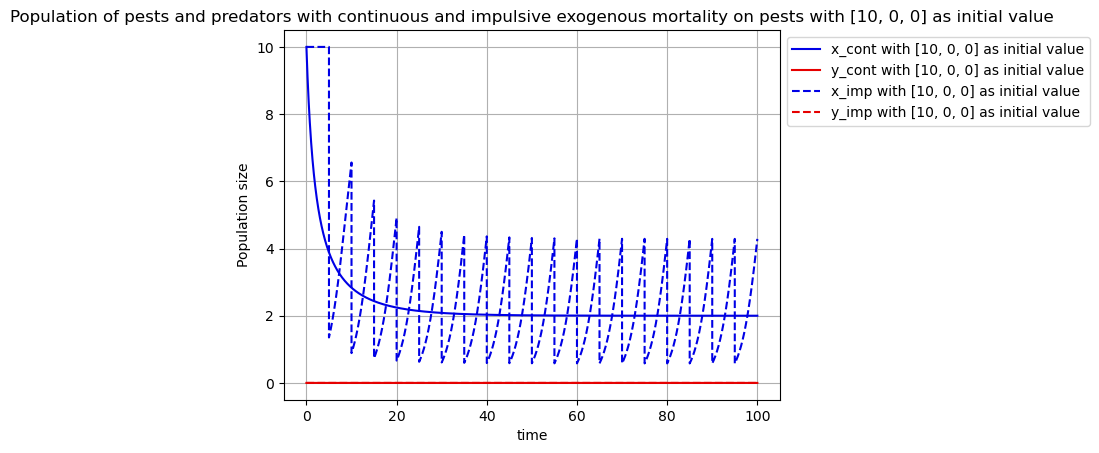

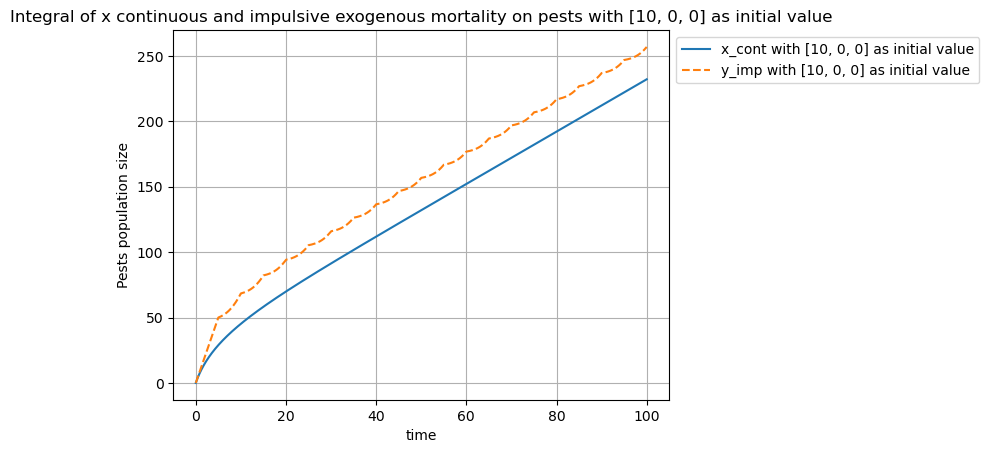

In [57]:
#Solve ODE
##Continuous
xyI_cont = double_exo.solve_predator_prey_model(
        xyI=[K,0,0],
        t=tt,
        gamma=gamma,
        E_x=0, #useless because it will be multiplied by 0. It's just to not lose the E
        E_y=0, #useless because it will be multiplied by 0. It's just to not lose the E
        T=5,
        func_g=double_exo.logistic_sub_E_x,
        kwargs_g={'r':r, 'K':K, 'E_x':0.4},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_zero_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_cont = xyI_cont[1]
y_cont = xyI_cont[2]
I_cont = xyI_cont[3]

t = xyI_cont[0]

##Impulsive
xyI_imp = double_exo.solve_predator_prey_model(
        xyI=[K,0,0],
        t=tt,
        gamma=gamma,
        E_x= 1 - np.exp(-0.4*5), #E for impulsive
        E_y=0, #useless because it will be multiplied by 0. It's just to not lose the E
        T=5,
        func_g=double_exo.logistic_model_x,
        kwargs_g={'r':r, 'K':K},
        func_f=double_exo.multiply_x,
        kwargs_f={'z': a}, 
        func_m=double_exo.identity,
        kwargs_m={'z': m},
        func_h_x=double_exo.return_x_x,
        kwargs_h_x={},
        func_h_y=double_exo.return_zero_y, 
        kwargs_h_y={},
        t_0=t_0,
        t_n=t_n  
        )
x_imp = xyI_imp[1]
y_imp = xyI_imp[2]
I_imp = xyI_imp[3]

#Plot results
##Evolution of the populations
plt.figure()
plt.plot(t, x_cont, color = (0,0,0.9), linestyle='-', label=f'x_cont with {[K,0,0]} as initial value')
plt.plot(t, y_cont, color = (0.9,0,0), linestyle='-', label=f'y_cont with {[K,0,0]} as initial value')
plt.plot(t, x_imp, color = (0,0,0.9), linestyle='--', label=f'x_imp with {[K,0,0]} as initial value')
plt.plot(t, y_imp, color = (0.9,0,0), linestyle='--', label=f'y_imp with {[K,0,0]} as initial value')
plt.xlabel('time')
plt.ylabel('Population size')
plt.title(f'Population of pests and predators with continuous and impulsive exogenous mortality on pests with {[K,0,0]} as initial value')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

##Integral of x
plt.figure()
plt.plot(t, I_cont, linestyle='-', label=f'x_cont with {[K,0,0]} as initial value')
plt.plot(t, I_imp, linestyle='--', label=f'y_imp with {[K,0,0]} as initial value')
plt.xlabel('time')
plt.ylabel('Pests population size')
plt.title(f'Integral of x continuous and impulsive exogenous mortality on pests with {[K,0,0]} as initial value')
plt.legend(loc= 'upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

Plot with one general function.

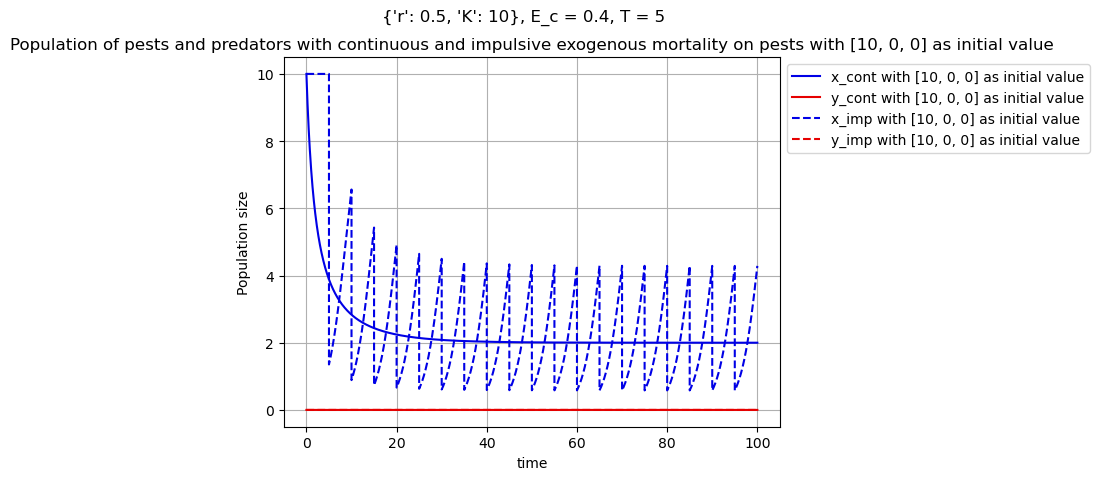

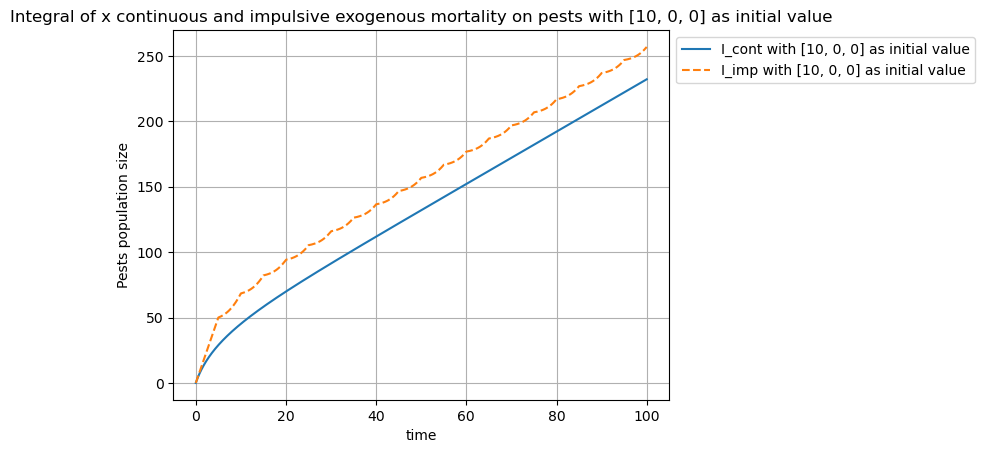

In [58]:
double_exo.plot_cont_imp_proportional_mortality_on_x(
    xyI = [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=0.4,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n
)

We have got the same exact results. We can use the general function.

With $E_c = r$

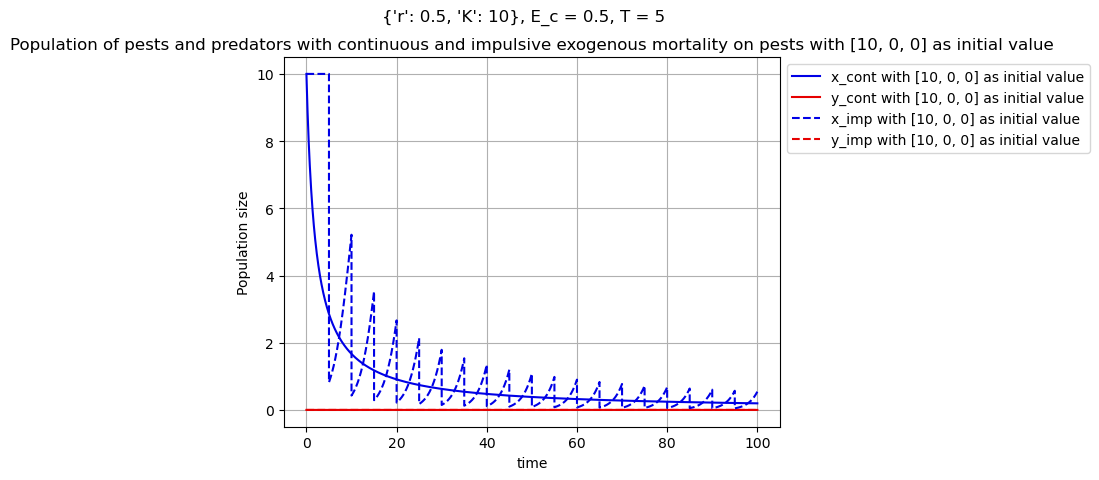

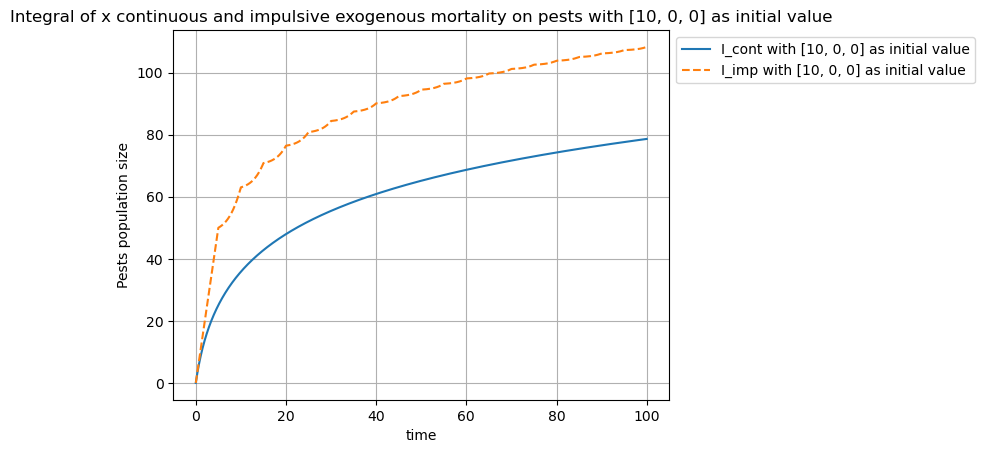

In [59]:
double_exo.plot_cont_imp_proportional_mortality_on_x(
    xyI = [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=r,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n
)

With $E_c > r$

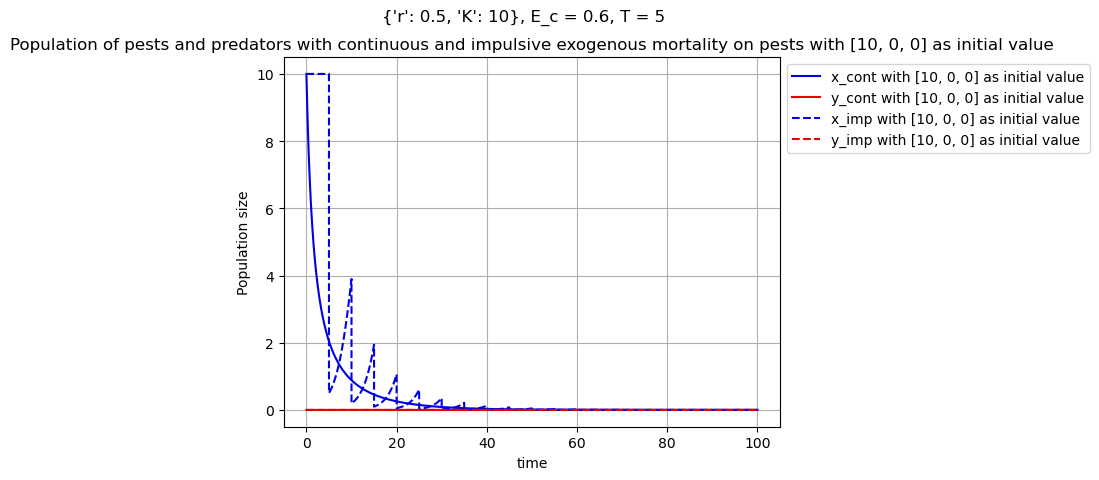

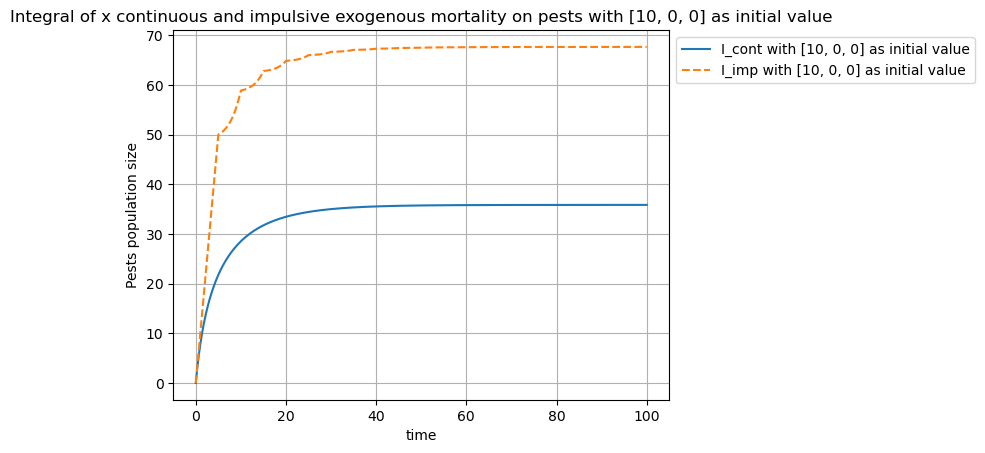

In [60]:
double_exo.plot_cont_imp_proportional_mortality_on_x(
    xyI = [K,0,0],
    t=tt,
    gamma=gamma,
    E_c=0.6,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n
)

Try the initial value of the periodic solution

In [61]:
E = 0.4
T=5
E_tilde = 1 - np.exp(-E*T)
x_p_0 = ( ( np.exp(r*T) * (1 - E_tilde) - 1 ) * K ) / ( np.exp(r*T) - 1 )

In [62]:
print(K * (1 - E/r))

1.9999999999999996


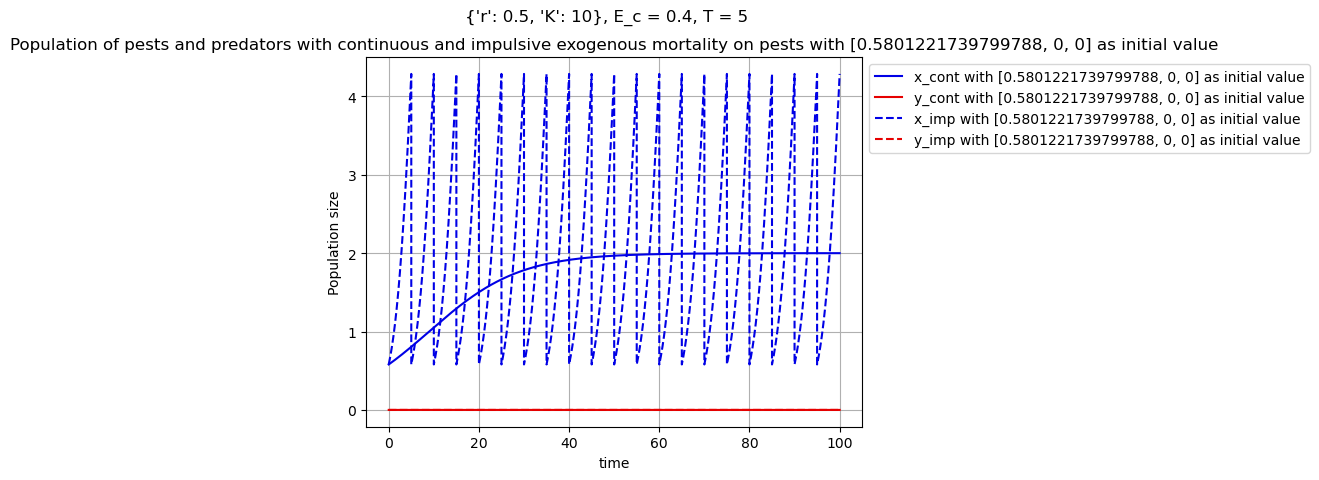

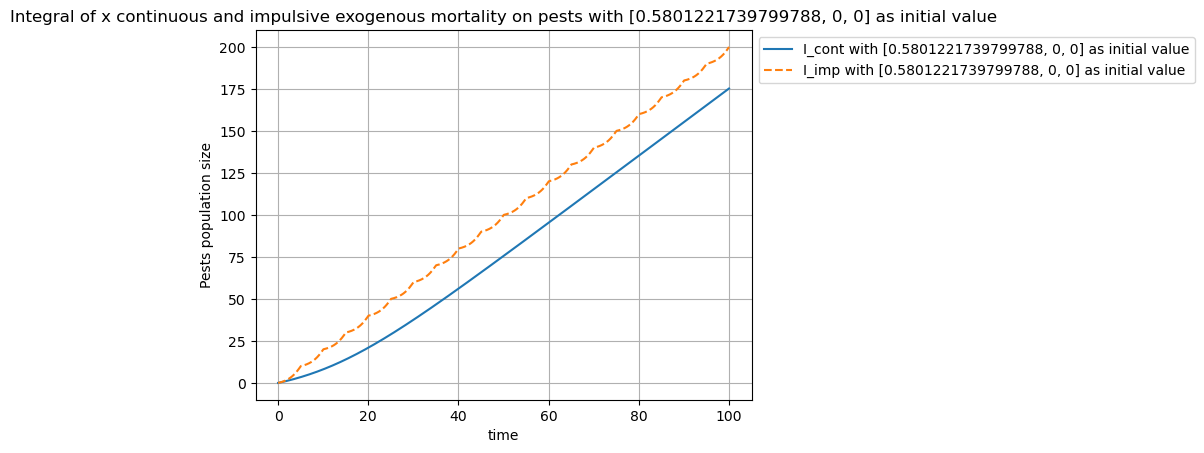

In [63]:
double_exo.plot_cont_imp_proportional_mortality_on_x(
    xyI = [x_p_0,0,0],
    t=tt,
    gamma=gamma,
    E_c=0.4,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n
)

The initial value of the periodic solution of the impulsive model is not the equilibrium of the continuous model

Let's try with a mortality at $t_0$

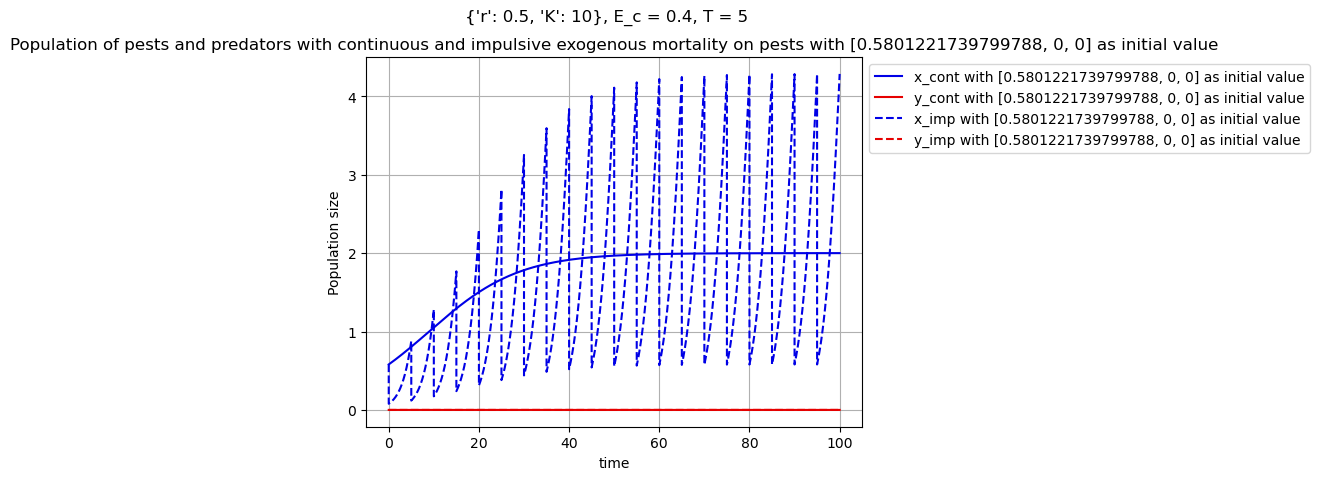

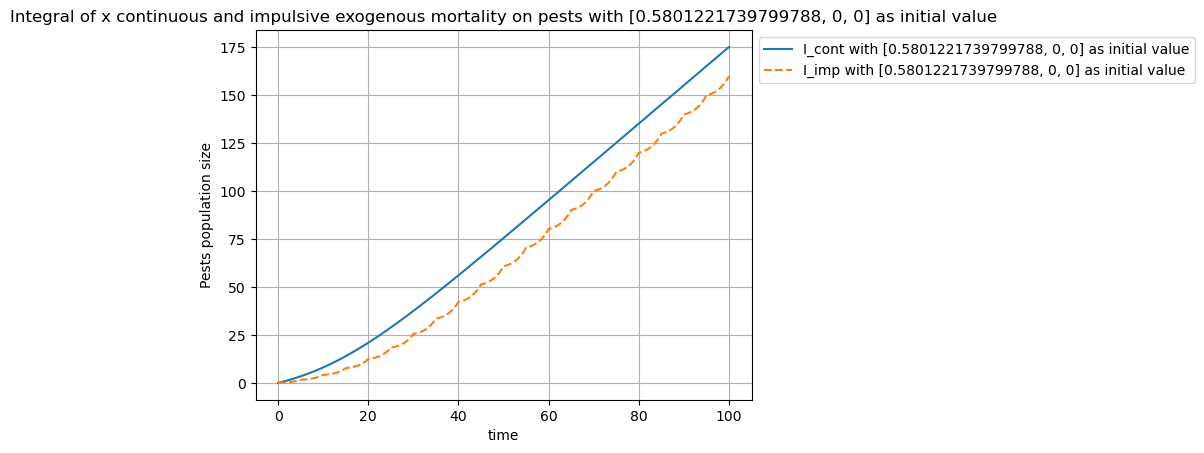

In [64]:
#with x_p_0
double_exo.plot_cont_imp_proportional_mortality_on_x_0(
    xyI = [x_p_0,0,0],
    t=tt,
    gamma=gamma,
    E_c=0.4,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n
)

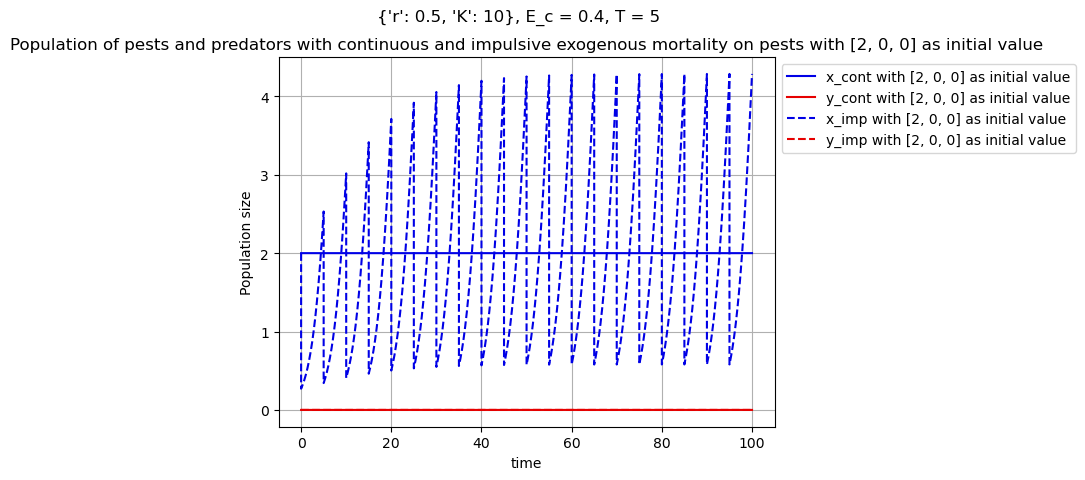

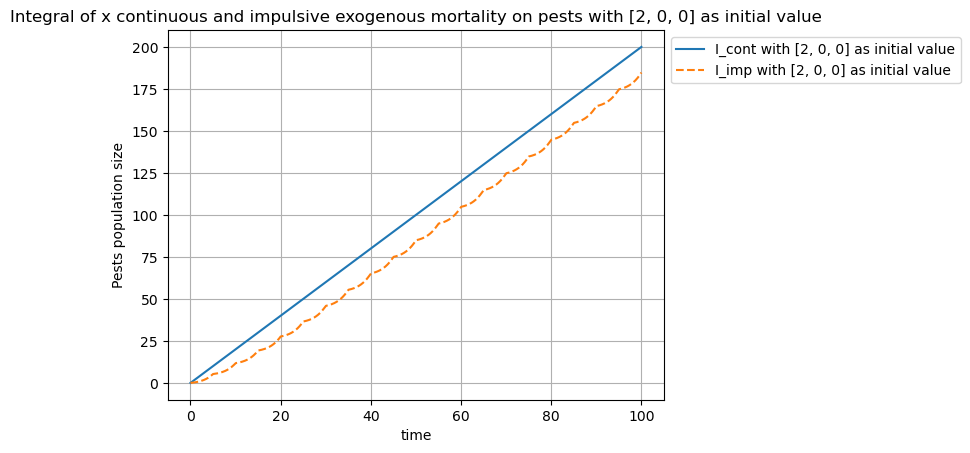

In [65]:
#with x* = 2
double_exo.plot_cont_imp_proportional_mortality_on_x_0(
    xyI = [2,0,0],
    t=tt,
    gamma=gamma,
    E_c=0.4,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n
)

The equilibrium and the initial value of the periodic solution are not the same neither when the first event of mortality occurs at $t_0$ nor at $t_0 + T$  
Two options:  
-Create a function that helps us to choose the first event of mortality on $[t_0, t_0 + T]$ (long)  
-Create a function that makes us choos different initial values for continuous ans impulsive model (not precise when we want exactly the equilibrium and periodic solution)

# 2 Both pests $x$ and predators $y$

In [66]:
#Same initial value
xyI0 = [K, K/5, 0]

Try with $E_c < r$

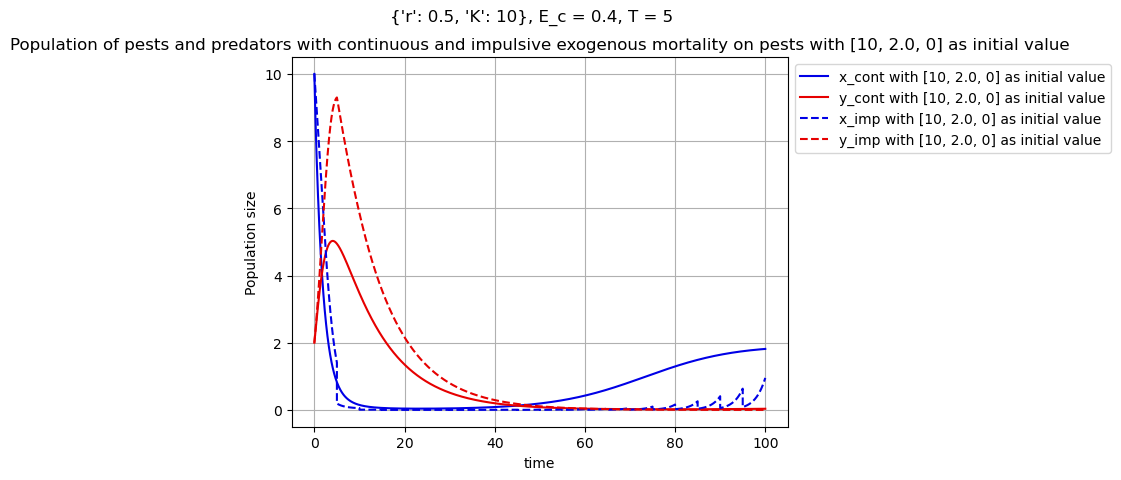

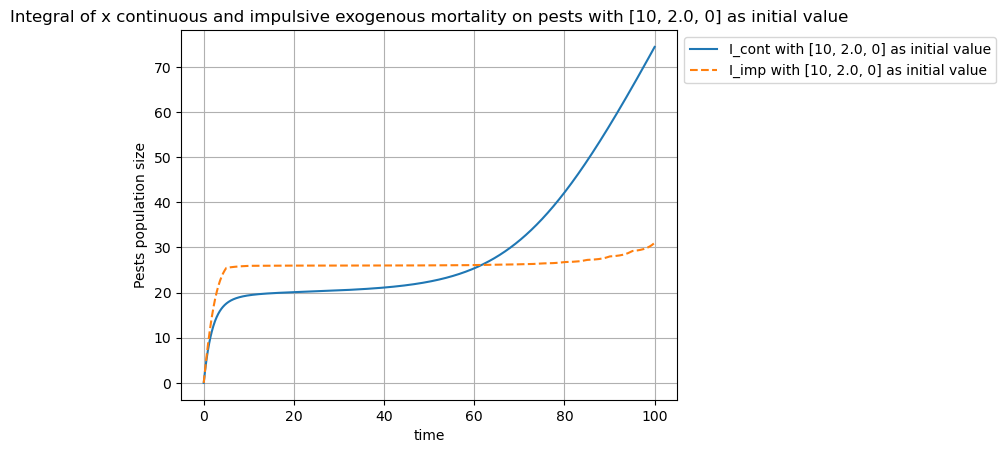

In [67]:
#First mortality event at T
double_exo.plot_cont_imp_proportional_mortality_on_x(
    xyI = xyI0,
    t=tt,
    gamma=gamma,
    E_c=0.4,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n
)

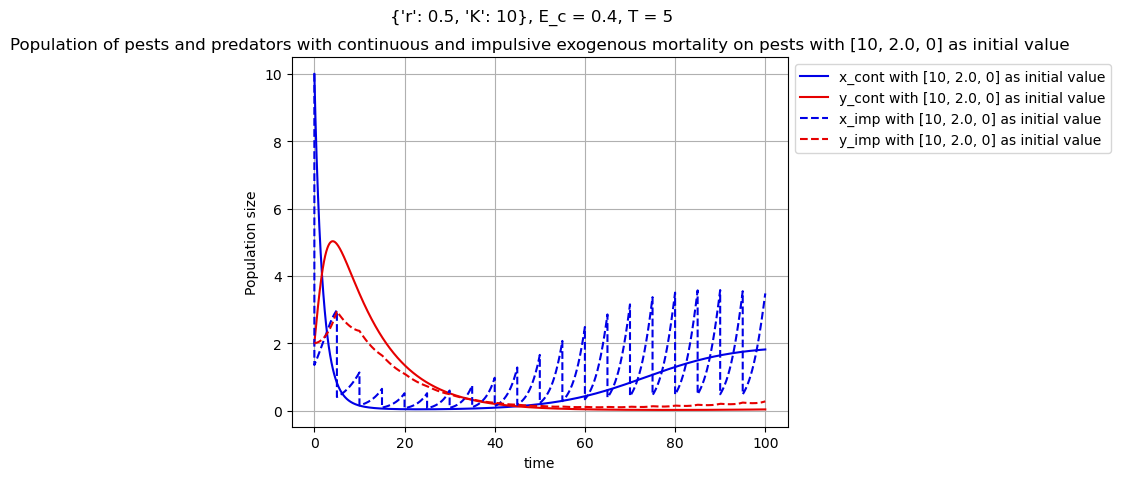

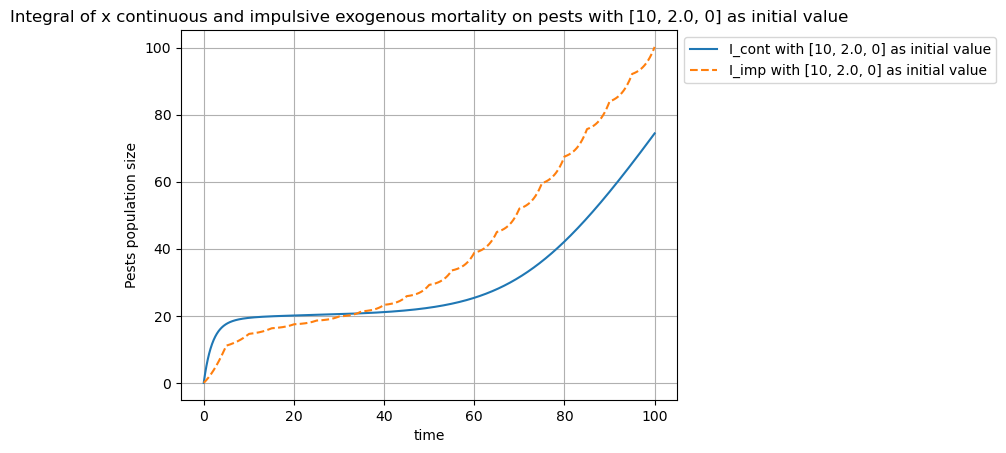

In [68]:
#First mortality event at 0
double_exo.plot_cont_imp_proportional_mortality_on_x_0(
    xyI = xyI0,
    t=tt,
    gamma=gamma,
    E_c=0.4,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n
)

Try with $E_c = r$

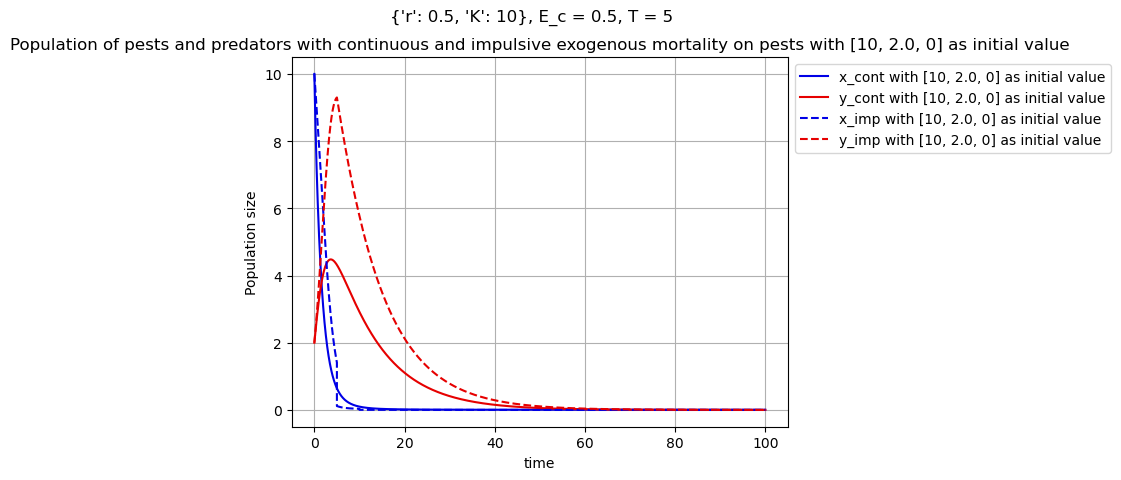

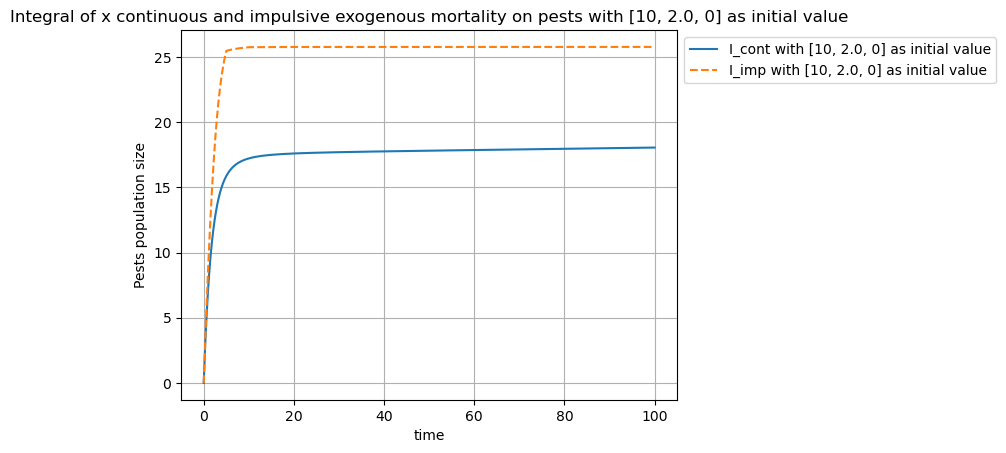

In [69]:
#First mortality event at T
double_exo.plot_cont_imp_proportional_mortality_on_x(
    xyI = xyI0,
    t=tt,
    gamma=gamma,
    E_c=r,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n
)

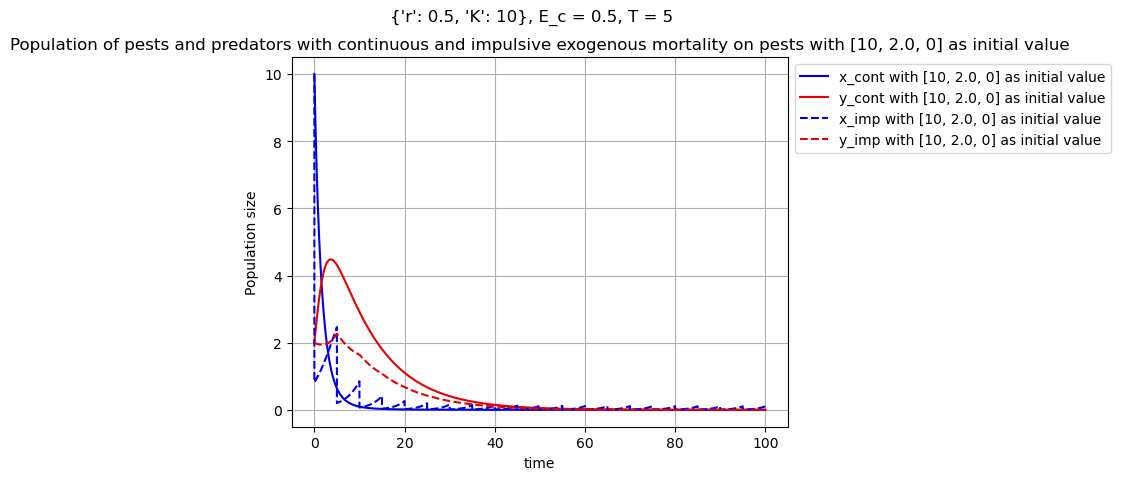

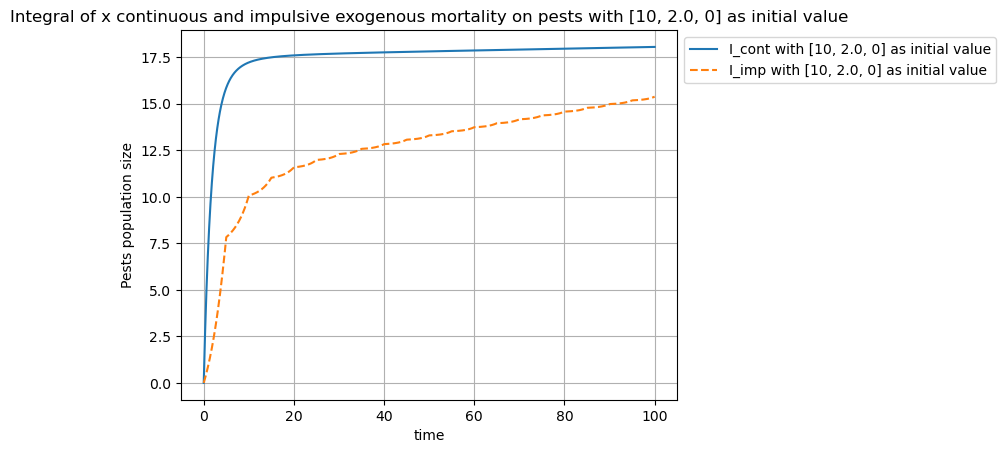

In [70]:
#First mortality event at 0
double_exo.plot_cont_imp_proportional_mortality_on_x_0(
    xyI = xyI0,
    t=tt,
    gamma=gamma,
    E_c=r,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n
)

Try with $E_c > r$

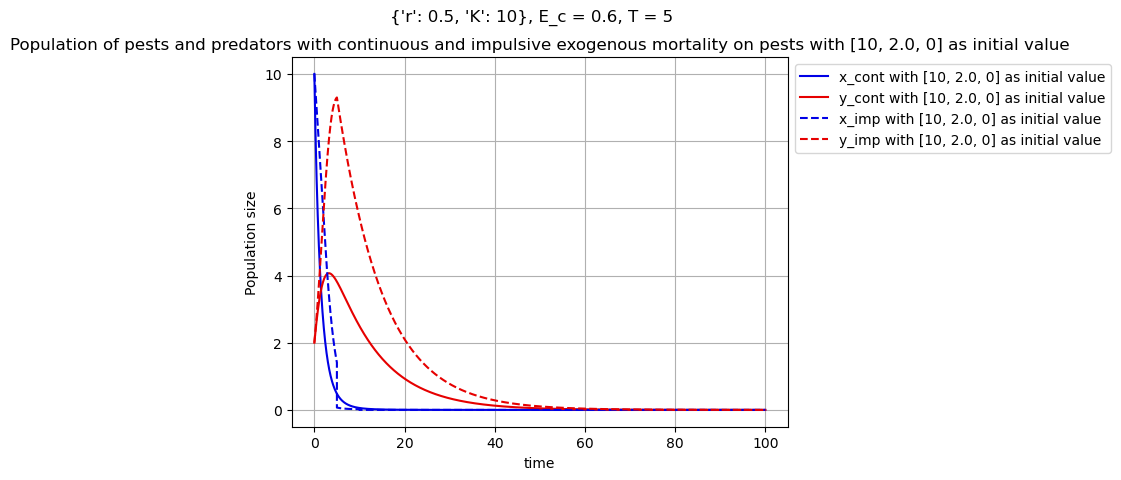

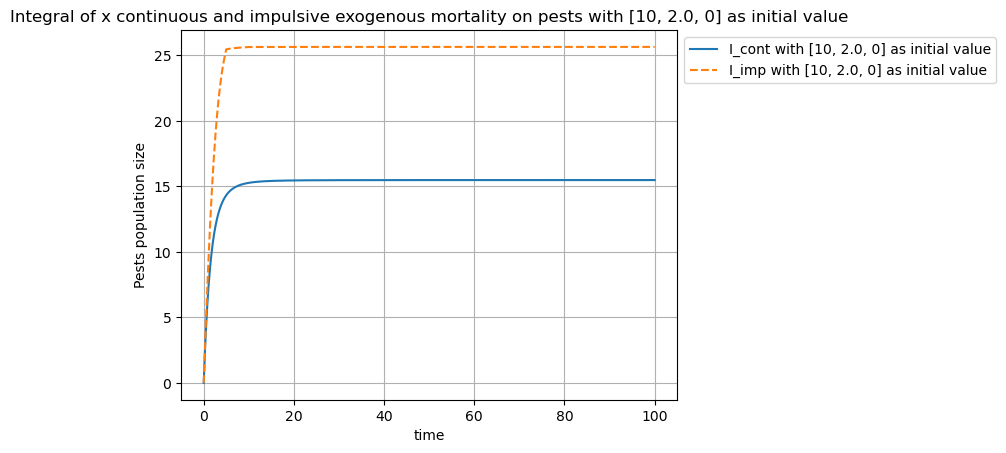

In [71]:
#First mortality event at T
double_exo.plot_cont_imp_proportional_mortality_on_x(
    xyI = xyI0,
    t=tt,
    gamma=gamma,
    E_c=0.6,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n
)

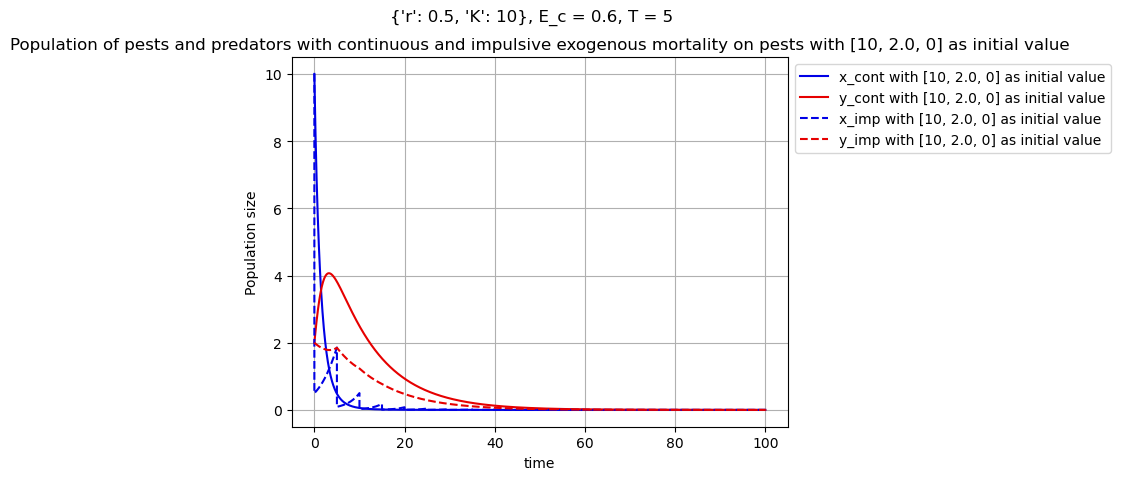

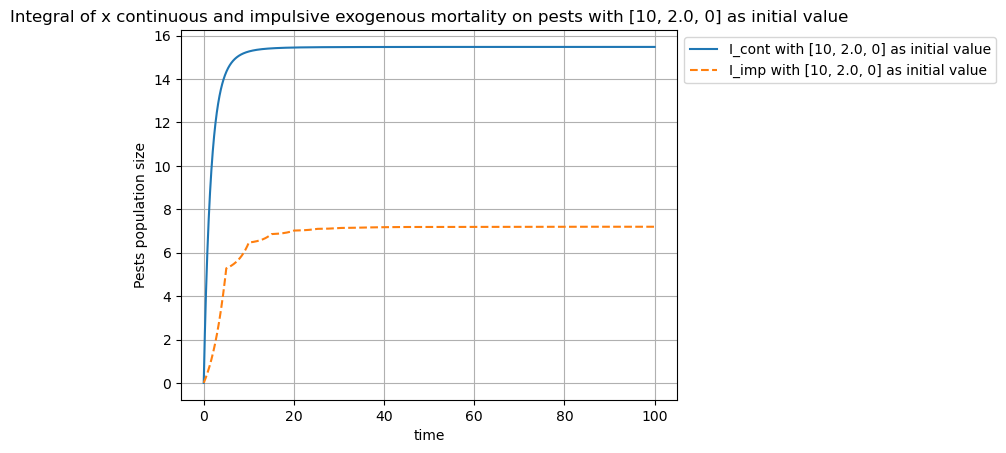

In [72]:
#First mortality event at 0
double_exo.plot_cont_imp_proportional_mortality_on_x_0(
    xyI = xyI0,
    t=tt,
    gamma=gamma,
    E_c=0.6,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n
)